In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats

C:\Users\selie\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("our data.csv") 

In [3]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Defect rates,Transportation modes,Routes,Costs,Revenue per Product,Product Availability Rate,shipping cost per porduct,defect rate per product%,production Efficiency,Manufacturing Cost per product
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,0.226410,Road,Route B,187.752075,10.800495,6.857855,0.003686,0.105307,7.413793,0.215255
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,4.854068,Road,Route B,503.065579,10.137092,12.907609,0.013202,0.938891,17.233333,0.065023
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,4.580593,Air,Route C,141.920282,1197.218703,425.000000,1.006810,0.471740,35.962963,0.031605
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,4.746649,Rail,Route A,254.776159,93.576342,81.927711,0.020838,0.506579,52.055556,0.038020
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,3.145580,Air,Route A,923.440632,3.084392,2.985075,0.004467,0.759802,138.000000,0.222380


In [4]:
print(df.describe())

            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239830     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976920   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

In [5]:
print(df.isnull().sum())

Product type                      0
SKU                               0
Price                             0
Availability                      0
Number of products sold           0
Revenue generated                 0
Customer demographics             0
Stock levels                      0
Lead times                        0
Order quantities                  0
Shipping times                    0
Shipping carriers                 0
Shipping costs                    0
Supplier name                     0
Location                          0
Lead time                         0
Production volumes                0
Manufacturing lead time           0
Manufacturing costs               0
Inspection results                0
Defect rates                      0
Transportation modes              0
Routes                            0
Costs                             0
Revenue per Product               0
Product Availability Rate         0
shipping cost per porduct         0
defect rate per product%    

In [6]:
df["Product type"] = df["Product type"].str.lower() 
df["Product type"] = df["Product type"].str.strip()  

In [7]:
# Convert 'Price' to float if it is not
df['Price'] = df['Price'].astype(float)

# Convert 'Availability' to integer 
df['Availability'] = df['Availability'].astype(int)

# After correction
print("Data Types After Correction:")
print(df.dtypes)

Data Types After Correction:
Product type                       object
SKU                                object
Price                             float64
Availability                        int32
Number of products sold             int64
Revenue generated                 float64
Customer demographics              object
Stock levels                        int64
Lead times                          int64
Order quantities                    int64
Shipping times                      int64
Shipping carriers                  object
Shipping costs                    float64
Supplier name                      object
Location                           object
Lead time                           int64
Production volumes                  int64
Manufacturing lead time             int64
Manufacturing costs               float64
Inspection results                 object
Defect rates                      float64
Transportation modes               object
Routes                             object
Costs

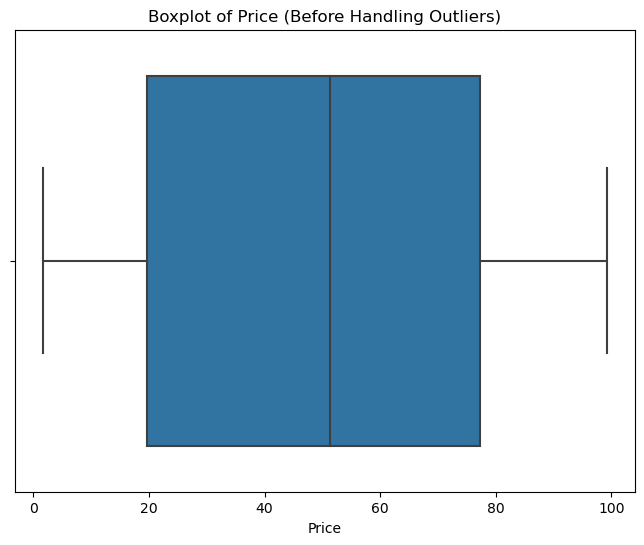

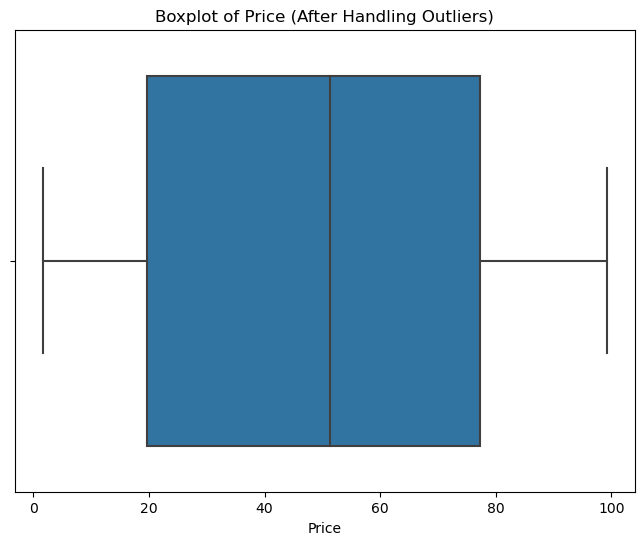

In [8]:
# Detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price (Before Handling Outliers)')
plt.show()

# Handle outliers using Z-score
z_scores = np.abs(stats.zscore(df['Price']))
df_no_outliers = df[(z_scores < 3)]

# outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers['Price'])
plt.title('Boxplot of Price (After Handling Outliers)')
plt.show()

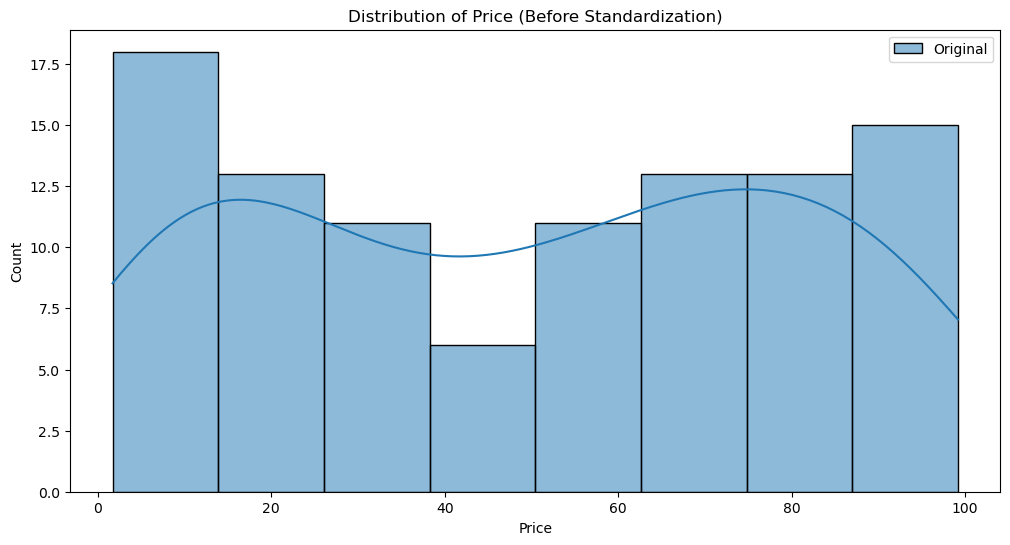

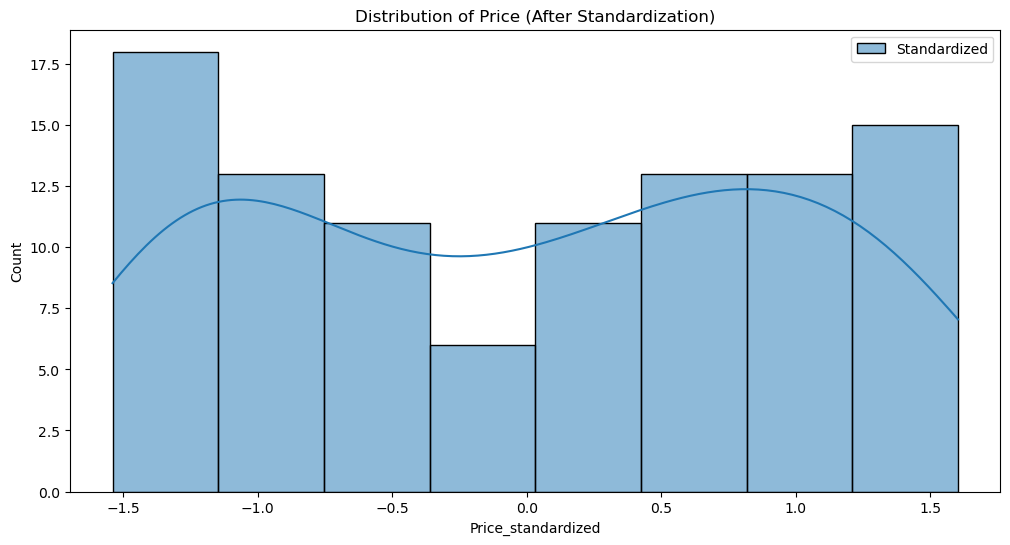

In [9]:
# Before standardization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], kde=True, label='Original')
plt.title('Distribution of Price (Before Standardization)')
plt.legend()
plt.show()

# Standardize the 'Price' column
scaler = StandardScaler()
df['Price_standardized'] = scaler.fit_transform(df[['Price']])

# After standardization
plt.figure(figsize=(12, 6))
sns.histplot(df['Price_standardized'], kde=True, label='Standardized')
plt.title('Distribution of Price (After Standardization)')
plt.legend()
plt.show()

In [10]:
df.to_csv(r"C:\Users\selie\Desktop\cleaned_data.csv", index=False, encoding="utf-8")
